In [1]:
import pandas as pd
from uncertainties import unumpy as unp
from uncertainties import ufloat
import numpy as np
import matplotlib.pyplot as plt
import THONKtools as THONK

In [66]:
data=pd.read_csv('measurements',delimiter='\t',index_col=None)

In [67]:
data

,Messung,Position,Streuung_links,Streuung_rechts
0,b0,110.35,0.0,0.0
1,b1,109.00,85.5,86.5
2,b2,109.00,87.2,88.4
3,b3,108.00,64.5,65.5
4,b4,108.50,76.6,78.2
5,b5,107.50,48.5,50.4
6,d6,111.50,64.0,65.0
7,d7,111.00,75.2,76.2
8,d8,112.00,54.4,55.7
9,d9,111.75,49.6,50.7


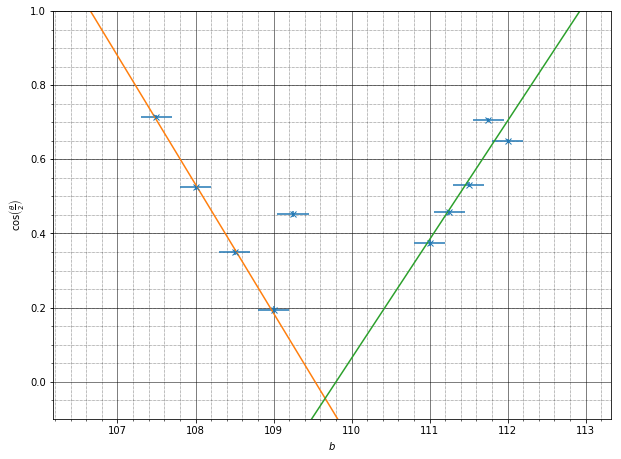

In [47]:
d=ufloat(63.8,0.5)
u=0.2
p=(unp.uarray(data.Streuung_links,u)+unp.uarray(data.Streuung_rechts,u))/2

def T(B,s):
    return (B)/s

fig=plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.minorticks_on()

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

pos=unp.uarray(data.Position,u)
th=(T(p,d/2))

plt.ylim([-0.1,1])

xf=np.linspace(106.5,113,100)

ax.errorbar(x=data.Position[2::],y=unp.nominal_values(unp.cos((th[2::]/2))),fmt='x'
             ,xerr=unp.std_devs(pos[2::]),yerr=unp.std_devs(unp.cos(th[2::]/2)))

a,b=np.polyfit(data.Position[2:6],np.cos(unp.nominal_values(th[2:6]/2)),deg=1)
fit=a*xf+b
ax.plot(xf,fit)
a1=a
er1=THONK.Db(data.Position[2:6],np.cos(unp.nominal_values(th[2:6]/2)))

a,b=np.polyfit(data.Position[6:11],np.cos(unp.nominal_values(th[6:11]/2)),deg=1)
fit=a*xf+b
ax.plot(xf,fit)
a2=a
er2=THONK.Db(data.Position[6:11],np.cos(unp.nominal_values(th[6:11]/2)))

fig_size=plt.rcParams["figure.figsize"]
fig_size[0]=10
fig_size[1]=7.5
plt.rcParams["figure.figsize"]=fig_size
plt.xlabel(r'$b$')
plt.ylabel(r'$\cos\left(\frac{\theta}{2}\right)$')
plt.show()

In [5]:
print(pos)
print((unp.cos(th[1::]/2)))

[110.35+/-0.2 109.0+/-0.2 109.0+/-0.2 108.0+/-0.2 108.5+/-0.2 107.5+/-0.2
 111.5+/-0.2 111.0+/-0.2 112.0+/-0.2 111.75+/-0.2 111.25+/-0.2
 109.25+/-0.2]
[0.22099438211470765+/-0.010527140386664493
 0.19339448638095394+/-0.010802642673057753
 0.5243806299888338+/-0.007055716708877509
 0.3500553415766737+/-0.009144864386086244
 0.7143661951790359+/-0.004524792077420773
 0.5310375303302504+/-0.006971314680397545
 0.37488799053200134+/-0.008862140883512924
 0.6502729457953712+/-0.005406186671126495
 0.7066456020116514+/-0.004632400222214908
 0.456805983472631+/-0.007893789980678348
 0.4526180348841045+/-0.007944586137150758]


In [6]:
print(th)

[0.0+/-0.004433271355401553 2.6959247648902824+/-0.021588043403899825
 2.7523510971786838+/-0.022021018401873697
 2.0376175548589344+/-0.01657275283937418
 2.4263322884012544+/-0.01952510103994434
 1.5501567398119125+/-0.012932188411475955
 2.021943573667712+/-0.016454425366851034
 2.3730407523510975+/-0.019118599032663164
 1.725705329153605+/-0.014232412688219231
 1.572100313479624+/-0.013093872107429733
 2.192789968652038+/-0.017747501282285794
 2.2021943573667713+/-0.017818876413117215]


In [48]:
print(a1,'+/-',er1)
print(a2,'+/-',er2)

-0.3474480829612933 +/- 5210.057362242211
0.3202438116263003 +/- 6402.879128170221


In [60]:
print(-a1**(-1)-0.435/2)
print(a2**(-1)-0.435/2)

2.6606278384874638
2.905120839796032


In [81]:
sl=np.array(data.Streuung_links)
sr=np.array(data.Streuung_rechts)
pos=(sl+sr)/2
p=(unp.uarray(sl,u)+unp.uarray(sr,u))/2

post=unp.uarray(np.array(data.Position),u)
th=(T(p,d/2))

er1=THONK.Da(unp.nominal_values(post[2:6]),np.cos(unp.nominal_values(th[2:6]/2)))
print(er1)

563996.2297032317
